# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Testing the common interface code



# Testing folder import
<hr style="border:2px solid black"> </hr>


- We can import a folder as a module as long as `__init__.py` is present inside that folder



In [1]:
!ls

KPT
Log_Keras.log
Log_PyTorch.log
README.md
Regression with Neural Networks implemented in PyTorch and Keras.ipynb
Testing several functions.ipynb
Testing the common interface code.ipynb
img
main.py


In [2]:
!ls KPT

Decorators.py     PostProcessing.py __init__.py
Modelling.py      PreProcessing.py  __pycache__
Modules.py        PyTorchTools.py   log.py


In [3]:
import KPT

# Test modules availability
<hr style="border:2px solid black"> </hr>


- The idea is to import a class `Modules()` and all its attributes available in its `__init__`.
- This will allows us to write something `M.K.Dense` so `Modules_().Keras.Dense`.
- Essentially we'd like to use the dot notation at our own advantage. 



In [4]:
from KPT.Modules import Modules
M = Modules()

In [5]:
dir(M)

['Data',
 'Dense',
 'EarlyStopping',
 'F',
 'Variable',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'callbacks',
 'functools',
 'keras',
 'layers',
 'logging',
 'mean_absolute_error',
 'mean_squared_error',
 'nn',
 'np',
 'plt',
 'r2_score',
 'random',
 'rcParams',
 'seed',
 'summary',
 'sys',
 'time',
 'torch',
 'train_test_split']

In [6]:
# print only instance attributes
#M.__dict__

In [7]:
M.__dir__()

['plt',
 'np',
 'seed',
 'train_test_split',
 'r2_score',
 'mean_squared_error',
 'mean_absolute_error',
 'rcParams',
 'sys',
 'random',
 'time',
 'functools',
 'logging',
 'keras',
 'layers',
 'callbacks',
 'Dense',
 'torch',
 'nn',
 'Variable',
 'F',
 'Data',
 'EarlyStopping',
 'summary',
 '__module__',
 '__doc__',
 '__init__',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [8]:
# Inspct out K = Keras Class
dir(M)

['Data',
 'Dense',
 'EarlyStopping',
 'F',
 'Variable',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'callbacks',
 'functools',
 'keras',
 'layers',
 'logging',
 'mean_absolute_error',
 'mean_squared_error',
 'nn',
 'np',
 'plt',
 'r2_score',
 'random',
 'rcParams',
 'seed',
 'summary',
 'sys',
 'time',
 'torch',
 'train_test_split']

# Test pre-processing class
<hr style="border:2px solid black"> </hr>


- This class takes car of all the actionn perform before modelling part.
- Things such as a plotting test function and pre-processing is done here.



In [9]:
# Definine a simple test function
import numpy as np
x = np.linspace(0, 10, 500)
y = np.sin(x)

In [10]:
import os
# Deleting previous logging files    
if os.path.exists("./Log_Keras.log"):
    os.remove("./Log_Keras.log")
if os.path.exists("./Log_PyTorch.log"):
    os.remove("./Log_PyTorch.log")

In [11]:
# Check no other .log files is present
!ls

KPT
README.md
Regression with Neural Networks implemented in PyTorch and Keras.ipynb
Testing several functions.ipynb
Testing the common interface code.ipynb
img
main.py


In [12]:
from KPT.PreProcessing import PreProcessing
# Instantiate a PP object for each model
PP_K = PreProcessing(x, y, log_file_name="Log_Keras")
PP_PT = PreProcessing(x, y, log_file_name="Log_PyTorch")

In [13]:
# Get the PP object attributes
PP_K.__dict__.keys()

dict_keys(['x', 'y', 'with_noise', 'yNoise', 'Set', 'split_method', 'log_file_name', 'log_file_dir', 'logger'])

## Plot test function
<hr style="border:2px solid black"> </hr>

plot_test_function was executed in: 0.035 [sec(s)]


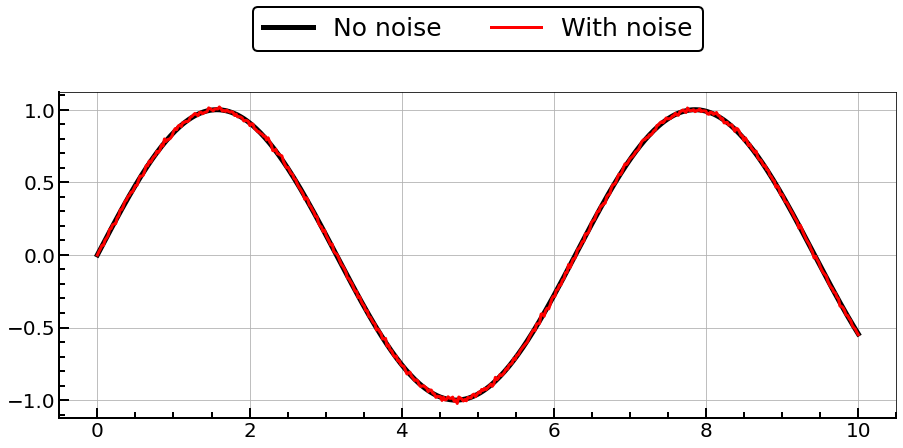

In [14]:
PP_K.plot_test_function()

## Split data set
<hr style="border:2px solid black"> </hr>

In [15]:
splitSet_K = PP_K.split_dataset(method = 3, test_size = 0.2)
splitSet_PT = PP_PT.split_dataset(method = 3, test_size = 0.2)

Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.006 [sec(s)]
Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.007 [sec(s)]


## Plot split set
<hr style="border:2px solid black"> </hr>

In [16]:
splitSet_K.keys()

dict_keys(['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'])

plot_split_set was executed in: 0.044 [sec(s)]


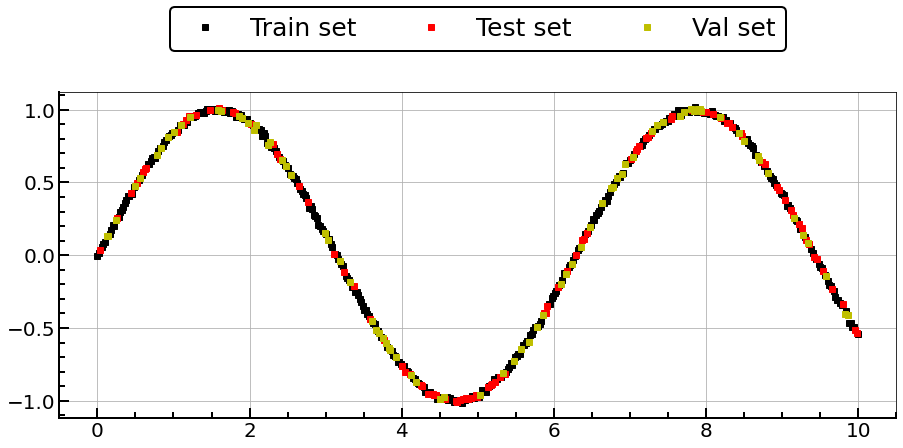

In [17]:
# Plotting PP_PT is the same thing so we ommit it
PP_K.plot_split_set()

## Input preparation
<hr style="border:2px solid black"> </hr>

In [18]:
SetK = PP_K.prepare_input("Keras", batch_size = 64)
SetPT = PP_PT.prepare_input("PyTorch", batch_size = 64)

prepare_input was executed in: 2.098 [sec(s)]
prepare_input was executed in: 0.001 [sec(s)]


In [19]:
SetK.keys()

dict_keys(['K_X_test', 'K_y_test', 'K_X_train', 'K_y_train', 'K_X_val', 'K_y_val'])

In [20]:
SetPT.keys()

dict_keys(['PT_loader_test', 'PT_X_test', 'PT_y_test', 'PT_loader_train', 'PT_X_train', 'PT_y_train', 'PT_loader_val', 'PT_X_val', 'PT_y_val'])

# Testing model building
<hr style="border:2px solid black"> </hr>


- This class takes car of all the actions perform WHILE modelling and training the model.
- We need to find a common high-level interface to build our fully connected NN. This is because Keras and PyTorch implemented it in a slighlty different way.
<br><br>
- I jotted down some of the requirements:
    - No of neuros per layer needs to be set explictly
    - Activation function needs to be ser explicitly
    - No of layers can be obtained implicitly
    - No of input layers can be obtained implicitly by checking the inputs.
- The figure below will help us visualise this process.
<br><br>
- We are also making the following assumptions:
    - One input and one outpput
    - We are dealing with a regressin problem only



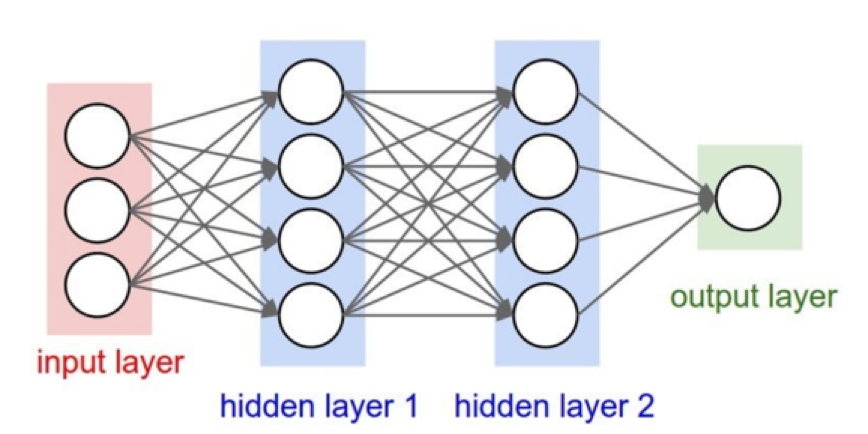

In [21]:
from KPT.Modelling import Modelling
# The order must be sequential and must make sense!
architecture = [
    ["Dense", 200, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 1]
]

In [22]:
# The architecture high level view is equal for both
ModelK = Modelling(PP_K)
ModelPT = Modelling(PP_PT)

In [23]:
modelPT = ModelPT.build_model("PyTorch", architecture, No_feature = 1) 

 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 
 
-> Adding layer: ['Dense', 200, 'ReLu']
-> Adding FIRST linear layer inputs: 1 200
-> Adding activation RELU
 
-> Adding layer: ['Dense', 100, 'ReLu']
-> Adding OTHER linear layer inputs: 200 100
-> Adding activation RELU
 
-> Adding layer: ['Dense', 100, 'ReLu']
-> Adding OTHER linear layer inputs: 100 100
-> Adding activation RELU
 
-> Adding layer: ['Dense', 1]
Adding LAST linear layer inputs:100 1
Model was successfully built!
build_model was executed in: 0.029 [sec(s)]


In [24]:
modelK = ModelK.build_model("keras", architecture, No_feature = 1) 

 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 

-> Adding layer: ['Dense', 200, 'ReLu']
200 ReLu 1
-> Adding linear layer with neurons No: 200

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 1]
Adding LAST linear layer with neurons No: 1
Model was successfully built!
build_model was executed in: 0.081 [sec(s)]



- We are now going to chekc if the two models have the same architecture.
- In particular look at the `Total params` value. They must be the same otherwise we are not comparing the same thing!



In [25]:
ModelPT.summary()

Printing is available on console ONLY for rendering reasons!
summary was executed in: 0.002 [sec(s)]


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            400
├─ReLU: 1-2                              --
├─Linear: 1-3                            20,100
├─ReLU: 1-4                              --
├─Linear: 1-5                            10,100
├─ReLU: 1-6                              --
├─Linear: 1-7                            101
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0


In [26]:
ModelPT.summary((200, 1))

Printing is available on console ONLY for rendering reasons!
summary was executed in: 0.006 [sec(s)]


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Linear: 1-1                            [200, 200]                400
├─ReLU: 1-2                              [200, 200]                --
├─Linear: 1-3                            [200, 100]                20,100
├─ReLU: 1-4                              [200, 100]                --
├─Linear: 1-5                            [200, 100]                10,100
├─ReLU: 1-6                              [200, 100]                --
├─Linear: 1-7                            [200, 1]                  101
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
Total mult-adds (M): 6.14
Input size (MB): 0.00
Forward/backward pass size (MB): 0.64
Params size (MB): 0.12
Estimated Total Size (MB): 0.77


In [27]:
ModelK.summary()

Printing is available on console ONLY!
summary was executed in: 0.002 [sec(s)]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________
None


# Testing model training
<hr style="border:2px solid black"> </hr>

In [28]:
ModelPT.train(verbose=False, lr=0.01, patience=20, epoch=200)

Console iteration output is ommitted, but can be acccessed via Post-Processing


EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 7 out of 20
EarlyStopping counter: 8 out of 20
EarlyStopping counte

train was executed in: 173.5 [sec(s)]


EarlyStopping counter: 20 out of 20
Early stopping
Current #124 loss 0.002404575399123132 valid_loss0.0014649158110842109


In [29]:
ModelK.train(verbose=True, lr=0.001, patience=20, epoch=200)

Console iteration output is ommitted, but can be acccessed via Post-Processing


Epoch 1/200
5/5 [==============================] - 0s 35ms/step - loss: 0.5962 - val_loss: 0.5861
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5838 - val_loss: 0.5698
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5848 - val_loss: 0.5731
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5788 - val_loss: 0.5812
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5749 - val_loss: 0.5568
Epoch 6/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5638 - val_loss: 0.5636
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5564 - val_loss: 0.5527
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5468 - val_loss: 0.5454
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5478 - val_loss: 0.5432
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5347 - val_loss: 0.5331
Epoch 11/200
5/5 [==========

5/5 [==============================] - 0s 6ms/step - loss: 0.1649 - val_loss: 0.1705
Epoch 85/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1614 - val_loss: 0.1471
Epoch 86/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1549 - val_loss: 0.1487
Epoch 87/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1581 - val_loss: 0.1469
Epoch 88/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1578 - val_loss: 0.1494
Epoch 89/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1628 - val_loss: 0.1510
Epoch 90/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1634 - val_loss: 0.1490
Epoch 91/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1665 - val_loss: 0.1535
Epoch 92/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1675 - val_loss: 0.1454
Epoch 93/200
5/5 [==============================] - 0s 6ms/step - loss: 0.1544 - val_loss: 0.1348
Epoch 94/200
5/5 [===============

train was executed in: 4.711 [sec(s)]


In [30]:
ModelK.history

{'train': [0.5961613059043884,
  0.5837826132774353,
  0.5847640037536621,
  0.5788158178329468,
  0.5748530030250549,
  0.5637812614440918,
  0.5564100742340088,
  0.5467918515205383,
  0.5477601885795593,
  0.534723162651062,
  0.5303739309310913,
  0.5234825015068054,
  0.5191181302070618,
  0.5108713507652283,
  0.5070317983627319,
  0.4921824038028717,
  0.4840242266654968,
  0.46650466322898865,
  0.4685451090335846,
  0.4479035437107086,
  0.4437594413757324,
  0.43114763498306274,
  0.42129436135292053,
  0.4093548357486725,
  0.3986942172050476,
  0.38845574855804443,
  0.37600815296173096,
  0.3642352521419525,
  0.34984925389289856,
  0.3348170816898346,
  0.3197013735771179,
  0.31627899408340454,
  0.3080293536186218,
  0.29829224944114685,
  0.29047518968582153,
  0.28787094354629517,
  0.2744688391685486,
  0.25895410776138306,
  0.2486329823732376,
  0.242816761136055,
  0.23146367073059082,
  0.22661015391349792,
  0.22416241466999054,
  0.22435399889945984,
  0.220138

# Testing post-processing class
<hr style="border:2px solid black"> </hr>


- This class takes car of all the actions perform AFTER the model has been built and trained.



In [31]:
from KPT.PostProcessing import PostProcessing

PP_K = PostProcessing(ModelK)
PP_PT = PostProcessing(ModelPT)

In [32]:
PP_K.get_metrics()
PP_PT.get_metrics()

[MSE]_keras: 0.0701
[RMSE]_keras: 0.2648
[MAE]_keras: 0.1300
[R2]_keras: 0.8661
get_metrics was executed in: 0.110 [sec(s)]
[MSE]_PyTorch: 0.0022
[RMSE]_PyTorch: 0.0470
[MAE]_PyTorch: 0.0345
[R2]_PyTorch: 0.9958
get_metrics was executed in: 0.005 [sec(s)]


plot_learning_curve was executed in: 0.030 [sec(s)]


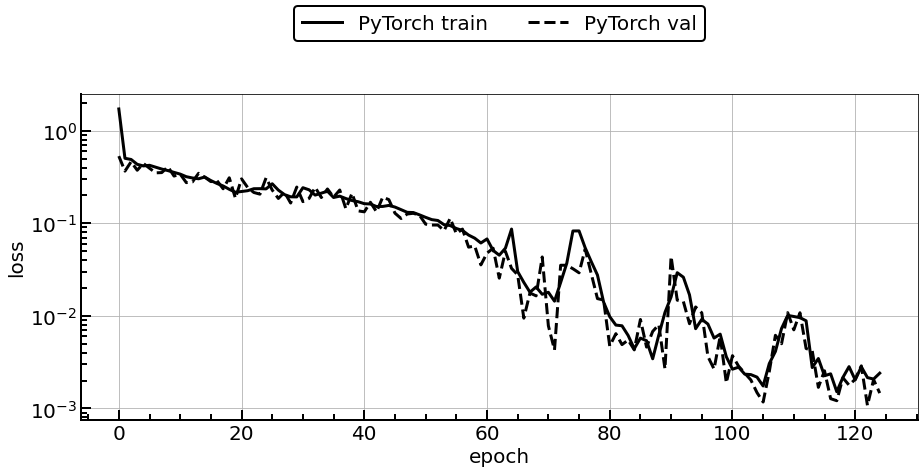

In [33]:
PP_PT.plot_learning_curve()

plot_learning_curve was executed in: 0.029 [sec(s)]


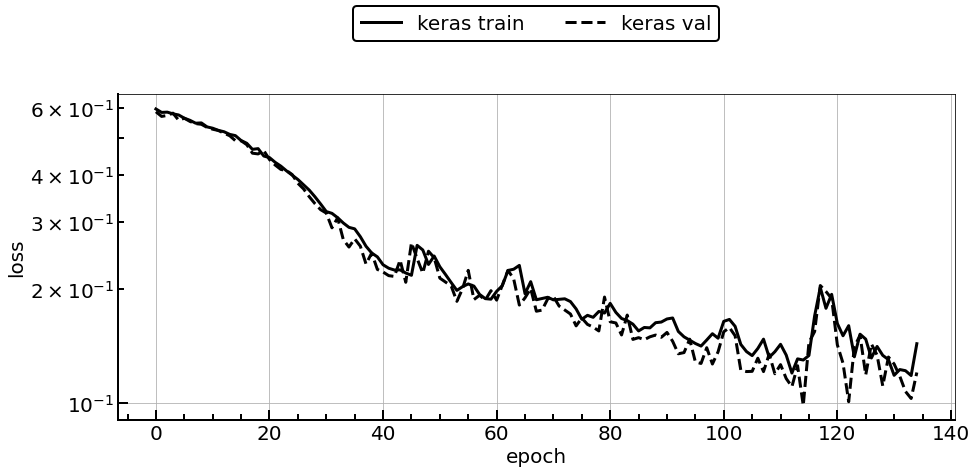

In [34]:
PP_K.plot_learning_curve()

plot_learning_curve was executed in: 0.030 [sec(s)]


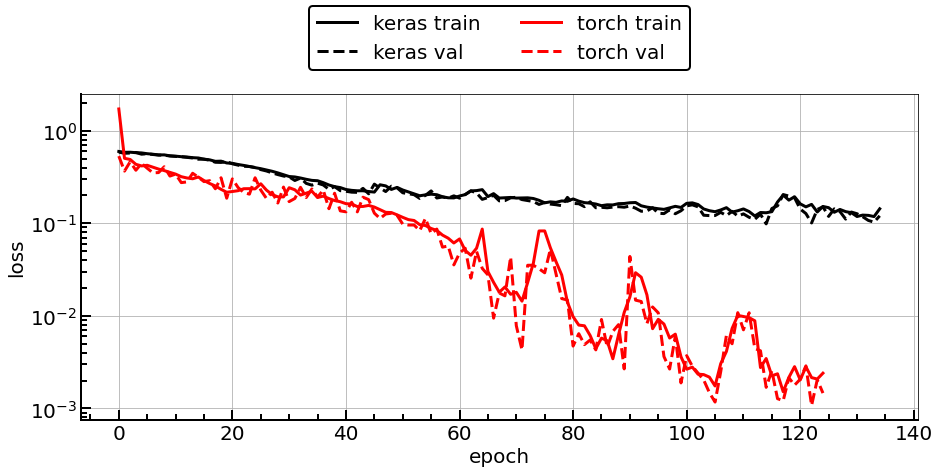

In [35]:
# You can add and additional plot by passing the history and the name of the new line.
PP_K.plot_learning_curve(ModelPT.history, "torch")

plot_final_result was executed in: 0.068 [sec(s)]


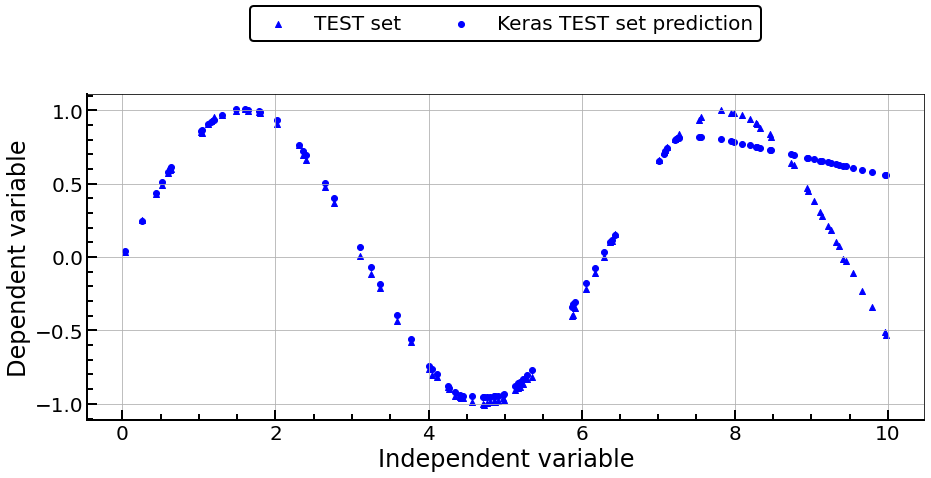

In [36]:
PP_K.plot_final_result(["test"])

plot_final_result was executed in: 0.147 [sec(s)]


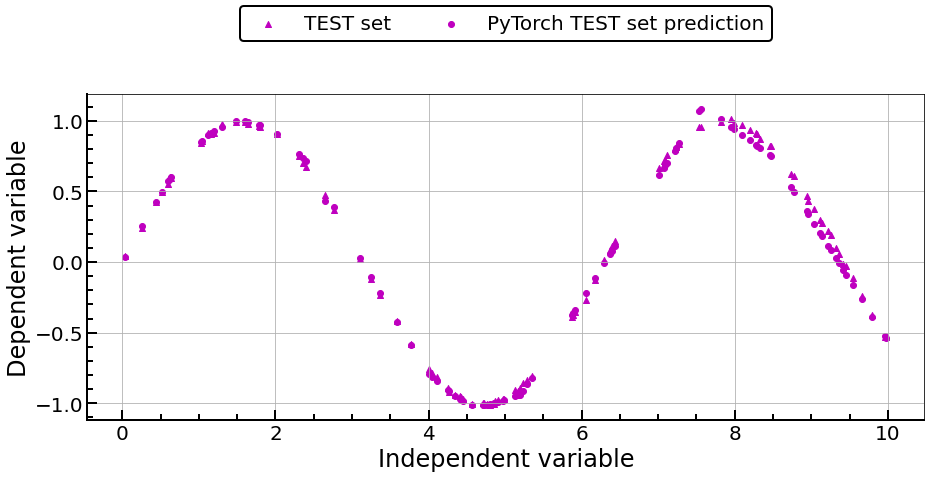

In [37]:
PP_PT.plot_final_result(["test"])